# Customer analysis in marketing campaigns

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find which are the ideal customers according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.

You have two days to do this study

### Library

In [4]:
import pandas as pd
import numpy as np

#viz
import seaborn as sns
import matplotlib.pyplot as plt 

### Read database

In [47]:
campaign_df = pd.read_csv('data/marketing_campaign.csv', sep="\t")
campaign_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [48]:
campaign_df.shape

(2240, 29)

# Analyzing Marketing campagn summary #<a class="anchor" id="retour"></a>

* [EDA](#chapter1)
* [Customer Segmentation](#chapter2)
* [Conclusion](#chapter3)

# EDA <a class="anchor" id="chapter1"></a>

In [49]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Ici, la lecture de toutes les informations.  
    Nous pouvons remarquer les informations essentielles qui nous intéresse dans le cadre de notre future segmentation client.  
                *Dt_Customers qui définie la date d'adhésion du client à l'entreprise.*  
                *Income qui concerne le revenue des clients.*  
                *Response pour les réponses apportées par les clients concernant les campagnes promotionnelles.* 

La plupart des données vont nous servir à comprendre le profil de chacun des clients par rapport aux informations les concernant ou concernant leurs achats. 

In [50]:
campaign_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Nous procédons aux nettoyages des données manquantes qui risquent de fausser nos analyses.  

In [51]:
campaign_df = campaign_df.dropna()

In [52]:
campaign_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [56]:
#distplot, boxplot / countplot Dt_Customer, Marital_Status, Education

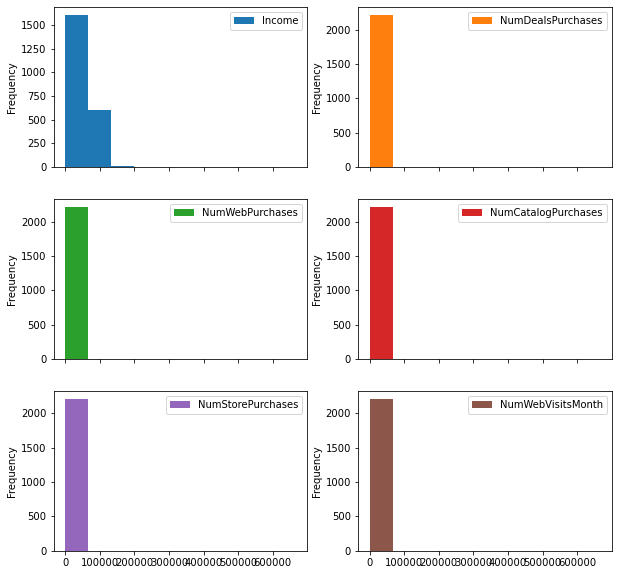

In [67]:
campaign_df[['Income',
             'NumDealsPurchases',
             'NumWebPurchases',
             'NumCatalogPurchases',
             'NumStorePurchases',
             'NumWebVisitsMonth']].plot(kind='hist', subplots=True, layout=(3, 2), figsize = (10, 10));

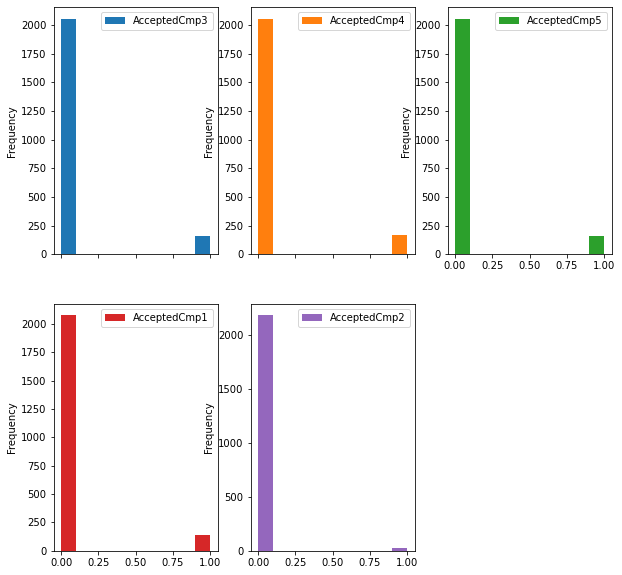

In [81]:
campaign_df[['AcceptedCmp3',
             'AcceptedCmp4',
             'AcceptedCmp5',
             'AcceptedCmp1',
             'AcceptedCmp2']].plot(kind='hist', subplots=True, layout=(2, 3), figsize = (10, 10));

C:\Users\Simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

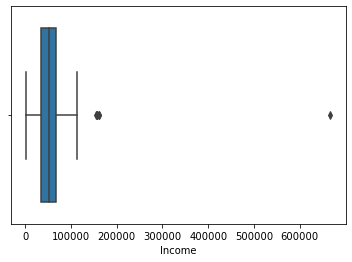

In [75]:
sns.boxplot(campaign_df.Income)

In [88]:
campaign_new = campaign_df[campaign_df['Income'] > 600000]

In [96]:
outlier = campaign_df['Income'].quantile(0.95)
df = campaign_df[campaign_df["Income"] < outlier]

C:\Users\Simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

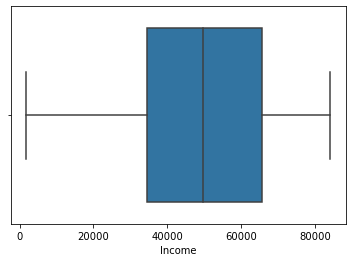

In [98]:
sns.boxplot(df.Income)

In [ ]:
# ID 
# Year_Birth

# (Income)

# Kidhome 
# Teenhome

# Recency

# MntWines
# MntFruits
# MntMeatProducts
# MntFishProducts
# MntSweetProducts
# MntGoldProds

# NumDealsPurchases
# NumWebPurchases
# NumCatalogPurchases
# NumStorePurchases
# NumWebVisitsMonth

# AcceptedCmp3
# AcceptedCmp4
# AcceptedCmp5
# AcceptedCmp1
# AcceptedCmp2

# Complain
# Z_CostContact
# Z_Revenue

# Response

## RFM

In [99]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [113]:
df['Frequency'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

<ipython-input-113-2d7218d36a6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Frequency'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']


In [114]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Frequency
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,22
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,4
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,20
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,16
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,15
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,18
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,21


In [115]:
df['Montant']= df['MntWines']+df['MntFruits']\
+df['MntMeatProducts']+df['MntFishProducts']+\
df['MntSweetProducts']+df['MntGoldProds']

<ipython-input-115-a537a098ea0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Montant']= df['MntWines']+df['MntFruits']\


In [127]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Frequency,Montant
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,22,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,4,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,20,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,6,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,14,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,16,1341
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,15,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,18,1241
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,21,843


In [130]:
quintiles = df[['Recency', 'Frequency', 'Montant']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 19.0, 0.4: 39.0, 0.6: 58.0, 0.8: 79.0},
 'Frequency': {0.2: 5.0, 0.4: 8.0, 0.6: 14.0, 0.8: 19.0},
 'Montant': {0.2: 54.0, 0.4: 171.60000000000002, 0.6: 561.0, 0.8: 1099.4}}

In [133]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [134]:
df['R'] = df['Recency'].apply(lambda x: r_score(x))
df['F'] = df['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
df['M'] = df['Montant'].apply(lambda x: fm_score(x, 'Montant'))

<ipython-input-134-254c63a921f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R'] = df['Recency'].apply(lambda x: r_score(x))
<ipython-input-134-254c63a921f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F'] = df['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
<ipython-input-134-254c63a921f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [136]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Frequency,Montant,R,F,M
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,22,1617,3,5,5
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,4,27,4,1,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,20,776,4,5,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,6,53,4,2,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,14,422,1,3,3


In [137]:
df['RFM Score'] = df['R'].map(str) + df['F'].map(str) + df['M'].map(str)
df.head()

<ipython-input-137-84e5705bbcc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RFM Score'] = df['R'].map(str) + df['F'].map(str) + df['M'].map(str)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Frequency,Montant,R,F,M,RFM Score
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,3,11,1,22,1617,3,5,5,355
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,3,11,0,4,27,4,1,1,411
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,3,11,0,20,776,4,5,4,454
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,3,11,0,6,53,4,2,1,421
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,3,11,0,14,422,1,3,3,133


In [138]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

df['Segment'] = df['R'].map(str) + df['F'].map(str)
df['Segment'] = df['Segment'].replace(segt_map, regex=True)
df.head()

<ipython-input-138-0e69a334e502>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Segment'] = df['R'].map(str) + df['F'].map(str)
<ipython-input-138-0e69a334e502>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Segment'] = df['Segment'].replace(segt_map, regex=True)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Frequency,Montant,R,F,M,RFM Score,Segment
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,3,11,1,22,1617,3,5,5,355,loyal customers
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,3,11,0,4,27,4,1,1,411,promising
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,3,11,0,20,776,4,5,4,454,loyal customers
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,3,11,0,6,53,4,2,1,421,potential loyalists
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,11,0,14,422,1,3,3,133,at risk


In [139]:
df['Segment'].value_counts()

hibernating            338
at risk                330
loyal customers        328
potential loyalists    299
about to sleep         175
champions              170
can't loose            168
promising              110
new customers          109
need attention          78
Name: Segment, dtype: int64

C:\Users\Simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


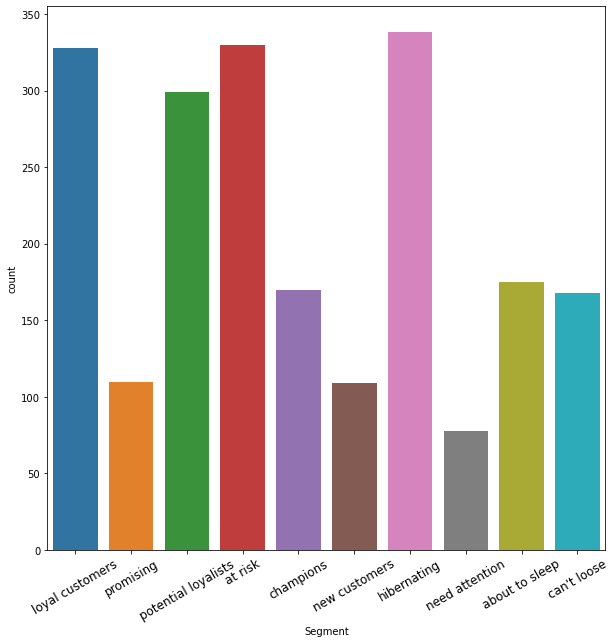

In [143]:
plt.figure(figsize= (10, 10))

sns.countplot(df['Segment'])

plt.xticks(fontsize=12, rotation=30)
plt.show()

In [147]:
campaign_new_df = df
#campaign_new_df.to_csv('campaign_rfm.csv', index=False)

## Cohort

In [148]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Frequency,Montant,R,F,M,RFM Score,Segment
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,3,11,1,22,1617,3,5,5,355,loyal customers
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,3,11,0,4,27,4,1,1,411,promising
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,3,11,0,20,776,4,5,4,454,loyal customers
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,3,11,0,6,53,4,2,1,421,potential loyalists
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,11,0,14,422,1,3,3,133,at risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,11,0,16,1341,3,4,5,345,loyal customers
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,3,11,0,15,444,3,4,3,343,loyal customers
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,11,0,18,1241,1,4,5,145,at risk
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,11,0,21,843,5,5,4,554,champions


# Customer Segmentation <a class="anchor" id="chapter2"></a>[#](#retour)

# Conlusions <a class="anchor" id="chapter3"></a> [#](#retour)